### Problem Statement:
**In bank Scenario, 
Based on various attributes, we have to decide whether the customer subscribe to a particular product or not**

**The product in this case is term deposit**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

bank_df=pd.read_csv('bank-additional-full.csv',sep=';')
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Below is the variables details

### Attribute Information:
**Bank client data**:
Age (numeric)
Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')
**Related with the last contact of the current campaign:**
Contact: contact communication type (categorical: 'cellular','telephone')
Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
Other attributes:
Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
Previous: number of contacts performed before this campaign and for this client (numeric)
Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
**Social and economic context attributes**
Emp.var.rate: employment variation rate - quarterly indicator (numeric)
Cons.price.idx: consumer price index - monthly indicator (numeric)
Cons.conf.idx: consumer confidence index - monthly indicator (numeric)
Euribor3m: euribor 3 month rate - daily indicator (numeric)
Nr.employed: number of employees - quarterly indicator (numeric)
Output variable (desired target):
y - has the client subscribed a term deposit? (binary: 'yes', 'no')

In [ ]:
bank_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
bank_df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

### Exploratory analysis

In [ ]:
print('Max. age:',bank_df['age'].max())
print('Min. age:',bank_df['age'].min())
print('Mean age:',bank_df['age'].mean())
print('Standard deviation in age:',bank_df['age'].std())

Max. age: 98
Min. age: 17
Mean age: 40.02406040594348
Standard deviation in age: 10.421249980934235


Text(0.5, 1.0, 'Age distribution in dataset')

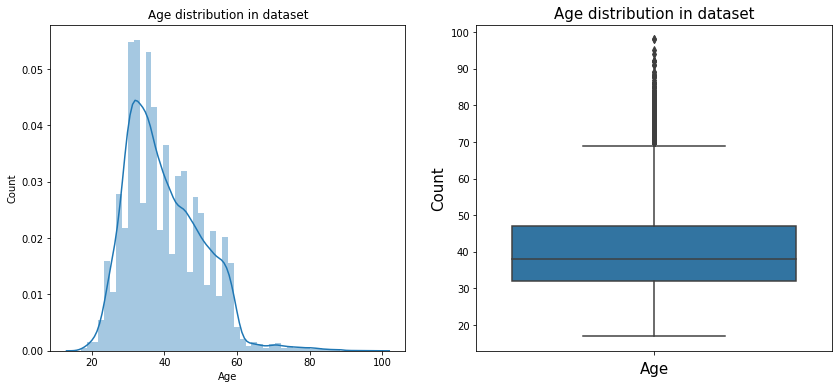

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.distplot(bank_df['age'],hist=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution in dataset')
plt.subplot(1,2,2)
sns.boxplot(x='age',data=bank_df,orient='v')
plt.xlabel('Age',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Age distribution in dataset',fontsize=15)

In [ ]:
#In our box plot it seems that age above 70 years are outliers

([<matplotlib.axis.XTick at 0x7f1cc9b36ba8>,
 <a list of 10 Text major ticklabel objects>)

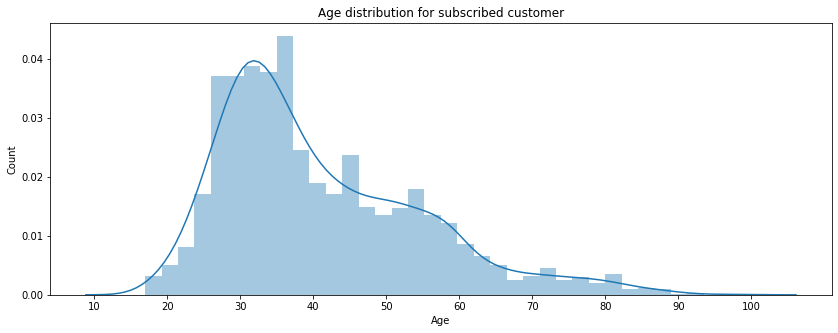

In [ ]:

plt.figure(figsize=(14,5))
sample=bank_df[bank_df['y']=='yes']
sns.distplot(sample['age'],hist=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution for subscribed customer')
plt.xticks([10,20,30,40,50,60,70,80,90,100])

In [ ]:
#From above graph age can be categorized as:
#17-26
#26-40
#40-56
#56 and above

In [ ]:
bank_df['age']=pd.cut(x=bank_df['age'],bins=[15,26,40,56,100],labels=['freshers','young','mature','declining'])

In [ ]:
bank_df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

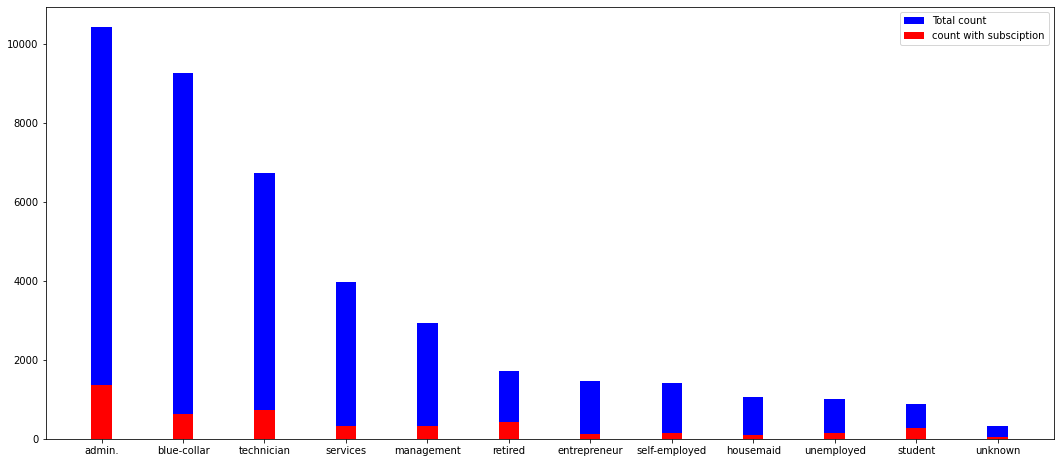

In [ ]:
samp1=bank_df.loc[bank_df['y']=='yes']
fig=plt.figure(figsize=(14,6))
ax=fig.add_axes([0,0,1,1])
ax.bar(x=bank_df['job'].value_counts().index,height=bank_df['job'].value_counts(),width=.25,color='blue',align='center',label='Total count')
ax.bar(x=samp1['job'].value_counts().index,height=samp1['job'].value_counts(),width=.25,color='red',label='count with subsciption')
ax.legend()

In [ ]:
#Above graph gives various insights:
# Most of the customer of banks are admin and also max. subscription to a particular service is from admin class.
#In proportion, the max subscription is from student class, almost 50%

In [ ]:
dummies=pd.get_dummies(bank_df['job'],drop_first=True)

In [ ]:
bank_df=pd.concat([dummies,bank_df],axis=1)

In [ ]:
bank_df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

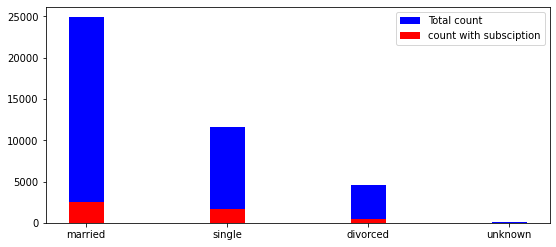

In [ ]:
samp1=bank_df.loc[bank_df['y']=='yes']
fig=plt.figure(figsize=(7,3))
ax=fig.add_axes([0,0,1,1])
ax.bar(x=bank_df['marital'].value_counts().index,height=bank_df['marital'].value_counts(),width=.25,color='blue',align='center',label='Total count')
ax.bar(x=samp1['marital'].value_counts().index,height=samp1['marital'].value_counts(),width=.25,color='red',label='count with subsciption')
ax.legend()

In [ ]:
dummies=pd.get_dummies(bank_df['marital'])
del dummies['unknown']
bank_df=pd.concat([dummies,bank_df],axis=1)

In [ ]:
bank_df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

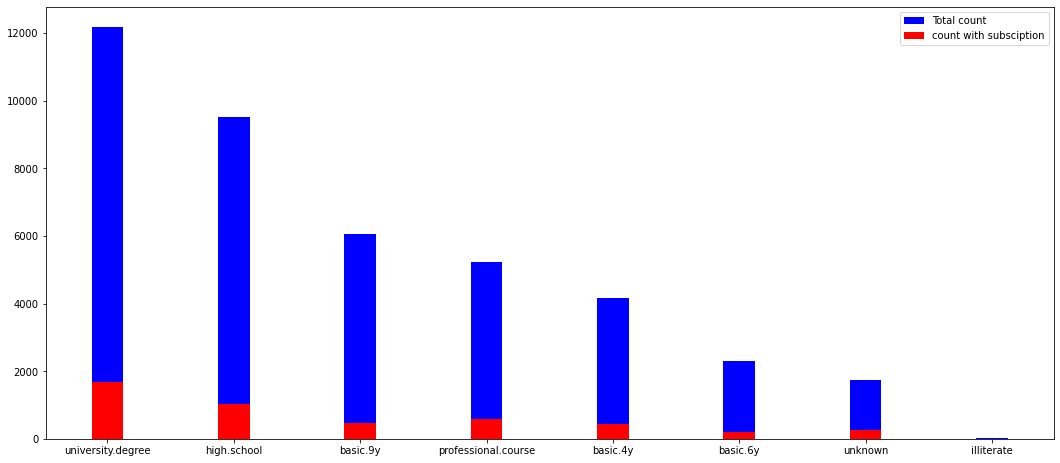

In [ ]:
samp1=bank_df.loc[bank_df['y']=='yes']
fig=plt.figure(figsize=(14,6))
ax=fig.add_axes([0,0,1,1])
ax.bar(x=bank_df['education'].value_counts().index,height=bank_df['education'].value_counts(),width=.25,color='blue',align='center',label='Total count')
ax.bar(x=samp1['education'].value_counts().index,height=samp1['education'].value_counts(),width=.25,color='red',label='count with subsciption')
ax.legend()

In [ ]:
#It can be seen that as the education level of people decreases, the tendency to subscribw to term deposit also decreases.

In [ ]:
dummies=pd.get_dummies(bank_df['education'])
del dummies['unknown']
bank_df=pd.concat([dummies,bank_df],axis=1)

Text(0, 0.5, 'Count')

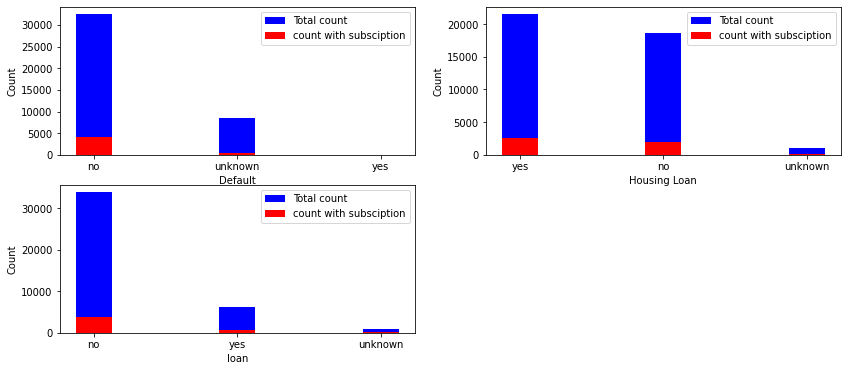

In [ ]:
samp1=bank_df.loc[bank_df['y']=='yes']
plt.figure(figsize=(14,6))
plt.subplot(2,2,1)
plt.bar(x=bank_df['default'].value_counts().index,height=bank_df['default'].value_counts(),width=.25,color='blue',align='center',label='Total count')
plt.bar(x=samp1['default'].value_counts().index,height=samp1['default'].value_counts(),width=.25,color='red',label='count with subsciption')
plt.legend()
plt.xlabel('Default')
plt.ylabel('Count')
plt.subplot(2,2,2)
plt.bar(x=bank_df['housing'].value_counts().index,height=bank_df['housing'].value_counts(),width=.25,color='blue',align='center',label='Total count')
plt.bar(x=samp1['housing'].value_counts().index,height=samp1['housing'].value_counts(),width=.25,color='red',label='count with subsciption')
plt.legend()
plt.xlabel('Housing Loan')
plt.ylabel('Count')
plt.subplot(2,2,3)
plt.bar(x=bank_df['loan'].value_counts().index,height=bank_df['loan'].value_counts(),width=.25,color='blue',align='center',label='Total count')
plt.bar(x=samp1['loan'].value_counts().index,height=samp1['loan'].value_counts(),width=.25,color='red',label='count with subsciption')
plt.legend()
plt.xlabel('loan')
plt.ylabel('Count')

In [ ]:
bank_df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [ ]:
#In graph 1, any person who is a defaulter( i.e. someone who has not paid his loan) had not subscribed to term deposit
#In graph 2, proportions of person with no housing loan are more than with housing loan who have subscribed to term deposit
#In graph 3, the number of customers who have taken loan are pretty much than without laon customers.

In [ ]:
dummies=pd.get_dummies(bank_df['default'])
del dummies['unknown']
bank_df=pd.concat([dummies,bank_df],axis=1)
dummies=pd.get_dummies(bank_df['housing'])
del dummies['unknown']
bank_df=pd.concat([dummies,bank_df],axis=1)
dummies=pd.get_dummies(bank_df['loan'])
del dummies['unknown']
bank_df=pd.concat([dummies,bank_df],axis=1)

In [ ]:
#Upto now,analysis of all the customer related variables is done.
# We can also remove some unnecessary variables

In [ ]:
del bank_df['job']
del bank_df['marital']
del bank_df['education']
del bank_df['default']
del bank_df['housing']
del bank_df['loan']

In [ ]:
#Analysis of variables related with contact of the current campaign

In [ ]:
bank_df.shape

(41188, 42)

In [ ]:
bank_df.dtypes

no                        uint8
yes                       uint8
no                        uint8
yes                       uint8
no                        uint8
yes                       uint8
basic.4y                  uint8
basic.6y                  uint8
basic.9y                  uint8
high.school               uint8
illiterate                uint8
professional.course       uint8
university.degree         uint8
divorced                  uint8
married                   uint8
single                    uint8
blue-collar               uint8
entrepreneur              uint8
housemaid                 uint8
management                uint8
retired                   uint8
self-employed             uint8
services                  uint8
student                   uint8
technician                uint8
unemployed                uint8
unknown                   uint8
age                    category
contact                  object
month                    object
day_of_week              object
duration

In [ ]:
bank_df['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [ ]:
bank_df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [ ]:
bank_df['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

Text(0, 0.5, 'Count')

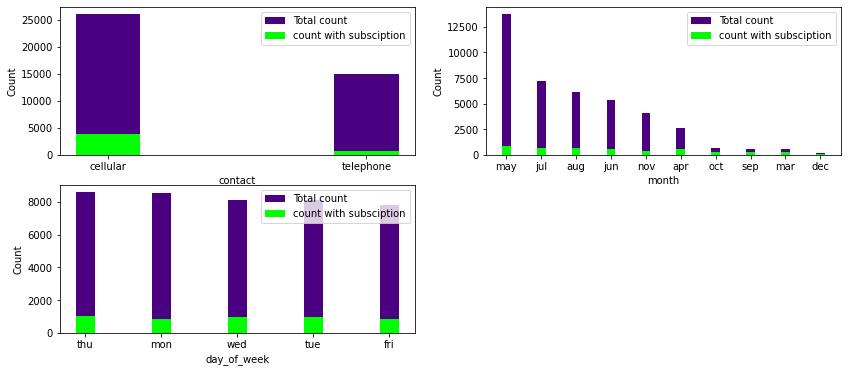

In [ ]:
samp1=bank_df.loc[bank_df['y']=='yes']
plt.figure(figsize=(14,6))
plt.subplot(2,2,1)
plt.bar(x=bank_df['contact'].value_counts().index,height=bank_df['contact'].value_counts(),width=.25,color='indigo',align='center',label='Total count')
plt.bar(x=samp1['contact'].value_counts().index,height=samp1['contact'].value_counts(),width=.25,color='lime',label='count with subsciption')
plt.legend()
plt.xlabel('contact')
plt.ylabel('Count')
plt.subplot(2,2,2)
plt.bar(x=bank_df['month'].value_counts().index,height=bank_df['month'].value_counts(),width=.25,color='indigo',align='center',label='Total count')
plt.bar(x=samp1['month'].value_counts().index,height=samp1['month'].value_counts(),width=.25,color='lime',label='count with subsciption')
plt.legend()
plt.xlabel('month')
plt.ylabel('Count')
plt.subplot(2,2,3)
plt.bar(x=bank_df['day_of_week'].value_counts().index,height=bank_df['day_of_week'].value_counts(),width=.25,color='indigo',align='center',label='Total count')
plt.bar(x=samp1['day_of_week'].value_counts().index,height=samp1['day_of_week'].value_counts(),width=.25,color='lime',label='count with subsciption')
plt.legend()
plt.xlabel('day_of_week')
plt.ylabel('Count')


In [ ]:
#Day of week doesn't seems to have any impact on product subscription conversion
#April and all other months are showing more conversion rate to subsciption than may. Looking carefully it can be inferred that months also doesn't have any significant impact on increases in subscription.
#It may be possible that there may be a saturation level of max. no. of subscribers after a large possible efforts
#Most of the contacts are made through cellular network and also more subscription is attained by this

In [ ]:
del bank_df['day_of_week']
del bank_df['month']
dummies=pd.get_dummies(bank_df['contact'])
del dummies['telephone']
bank_df=pd.concat([dummies,bank_df],axis=1)

In [ ]:
print('Max call duration:',bank_df['duration'].max())
print('Min. call duration:',bank_df['duration'].min())
print('Average call duration:',bank_df['duration'].mean())

Max call duration: 4918
Min. call duration: 0
Average call duration: 258.2850101971448


In [ ]:
#The duration is in seconds.

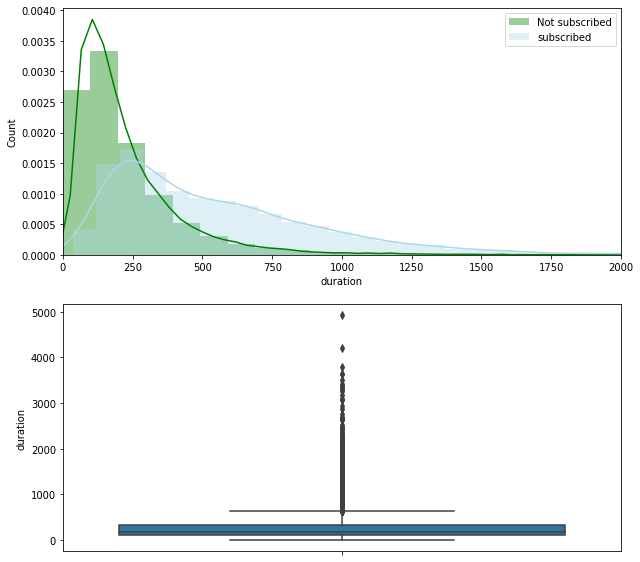

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.distplot(bank_df.loc[bank_df['y']=='no',['duration']],hist=True,color='green',label='Not subscribed')
sns.distplot(samp1['duration'],hist=True,color='lightblue',label='subscribed')
plt.legend()
plt.ylabel('Count')
plt.xlim(0,2000)
plt.subplot(2,1,2)
sns.boxplot(x='duration',data=bank_df,orient='v')

In [ ]:
#From above graph, it can be infered that as the call duration becomes more than 250 sec, the number of 'yes' are more than 'no'.

In [ ]:
#Thus calling definitely have significant impact on conversion rate from 'yes' to 'no'

In [ ]:
print('Max campaign value:',bank_df['campaign'].max())
print('Min. campaign value:',bank_df['campaign'].min())
print('Average campaign value:',bank_df['campaign'].mean())

Max campaign value: 56
Min. campaign value: 1
Average campaign value: 2.567592502670681


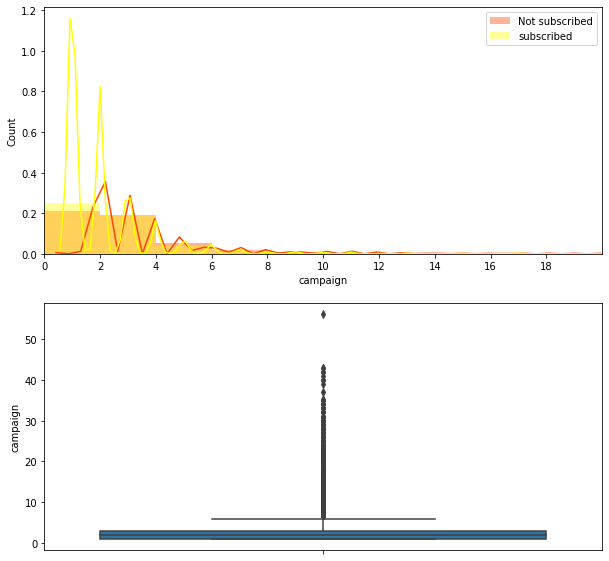

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.distplot(bank_df.loc[bank_df['y']=='no',['campaign']],hist=True,color='orangered',label='Not subscribed',bins=np.arange(0,150,2))
sns.distplot(samp1['campaign'],hist=True,color='yellow',label='subscribed',bins=np.arange(0,150,2))
plt.legend()
plt.xlim(0,20)
plt.xticks(np.arange(0,20,2))
plt.ylabel('Count')
plt.subplot(2,1,2)
sns.boxplot(x='campaign',data=bank_df,orient='v')

In [ ]:
#For 3 or less campaigns, no. of subsciber are more than with non-subscribers
#The values above 8 are outliers

In [ ]:
print('Max no. of p-days:',bank_df['pdays'].max())
print('Min. no. of p-days:',bank_df['pdays'].min())
print('Mean no. of p-days:',bank_df['pdays'].mean())

Max no. of p-days: 999
Min. no. of p-days: 0
Mean no. of p-days: 962.4754540157328


(0.0, 40.0)

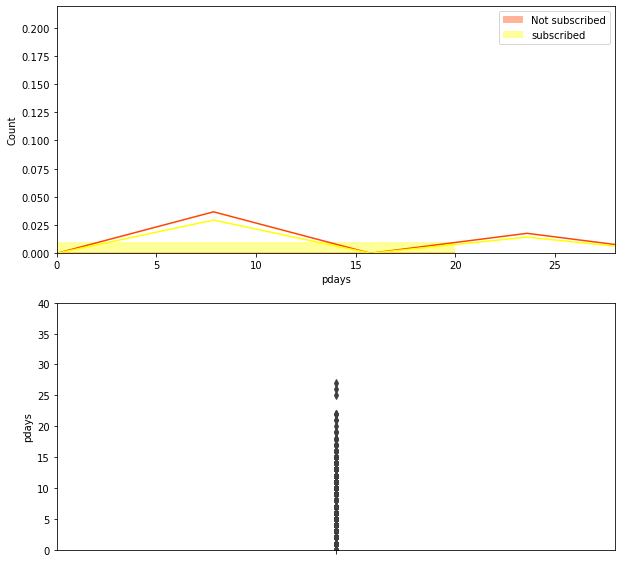

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.distplot(bank_df.loc[bank_df['y']=='no',['pdays']],hist=True,color='orangered',label='Not subscribed')
sns.distplot(samp1['pdays'],hist=True,color='yellow',label='subscribed')
plt.legend()
plt.xlim(0,28)
plt.ylabel('Count')
plt.subplot(2,1,2)
sns.boxplot(x='pdays',data=bank_df,orient='v')
plt.ylim(0,40)

In [ ]:
bank_df['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [ ]:
#999 here signifies that in our last campaign to attract customers, the customer was not called at all
#No. of days pass by have no impact on the conversion rate

In [ ]:
bank_df['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

(0.0, 5000.0)

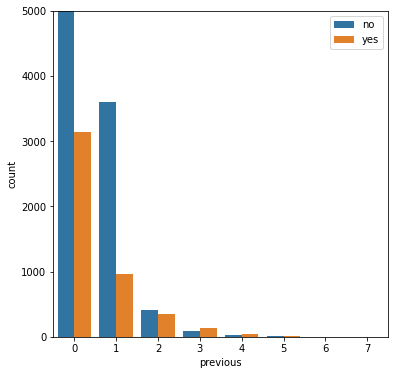

In [ ]:
#Previous shows that before the ongoing campaign, how many times the person was contacted
plt.figure(figsize=(6,6))
sns.countplot(x="previous",hue="y",data=bank_df)
plt.legend(loc='upper right')
plt.ylim(0,5000)

In [ ]:
#When no contact or 1 contact was performed, conversion rate is very low
#But then as the no. of contacts increased the conversion rate has increased


In [ ]:
bank_df['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [ ]:
#Most of the results of last marketing campaign are missings. Thus, this column can be dropped
del bank_df['poutcome']

In [ ]:
#The attributes which we'll analyze now are related to the social and economic aspects of the location in which the person is living

In [ ]:
bank_df.columns

Index(['cellular', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'basic.4y',
       'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'divorced', 'married',
       'single', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown', 'age', 'contact', 'duration', 'campaign',
       'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
bank_df['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

(0.0, 5000.0)

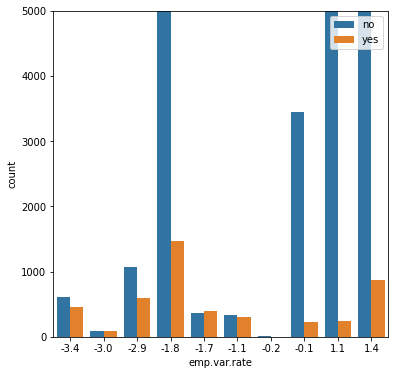

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x="emp.var.rate",hue="y",data=bank_df)
plt.legend(loc='upper right')
plt.ylim(0,5000)

In [ ]:
#Emp. variation rate with negative values have more probability of subscribing the product than with positive values.
#Thus we can convert it into categorical variable having positive or negative variation rate
bank_df['emp.var.rate']=pd.cut(bank_df['emp.var.rate'],bins=[-5,0,5],labels=['Negative','Positive'])

In [ ]:
bank_df['emp.var.rate'].value_counts()

Positive    23997
Negative    17191
Name: emp.var.rate, dtype: int64

In [ ]:
dummies=pd.get_dummies(bank_df['emp.var.rate'])


In [ ]:
del dummies['Positive']

In [ ]:
bank_df=pd.concat([bank_df,dummies],axis=1)

In [ ]:
bank_df['cons.price.idx'].value_counts()

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64

In [ ]:
bank_df['cons.conf.idx'].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

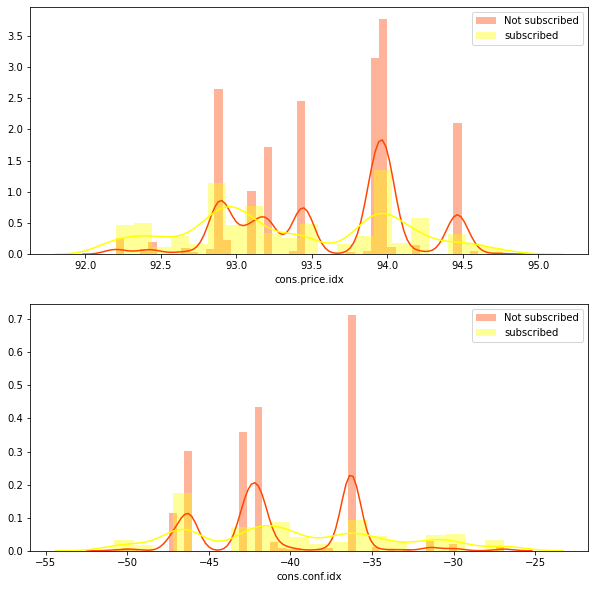

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.distplot(bank_df.loc[bank_df['y']=='no',['cons.price.idx']],hist=True,color='orangered',label='Not subscribed')
sns.distplot(samp1['cons.price.idx'],hist=True,color='yellow',label='subscribed')
plt.legend()
plt.subplot(2,1,2)
sns.distplot(bank_df.loc[bank_df['y']=='no',['cons.conf.idx']],hist=True,color='orangered',label='Not subscribed')
sns.distplot(samp1['cons.conf.idx'],hist=True,color='yellow',label='subscribed')
plt.legend()

In [ ]:
#In case of both consumer price and consumer coefficient index, there are certain intervals in which subscription rate is more.

In [ ]:
print('max. euribor 3 months rate:',bank_df['euribor3m'].max())
print('min. euribor 3 months rate:',bank_df['euribor3m'].min())
print('mean euribor 3 months rate:',bank_df['euribor3m'].mean())

max. euribor 3 months rate: 5.045
min. euribor 3 months rate: 0.634
mean euribor 3 months rate: 3.621290812858068


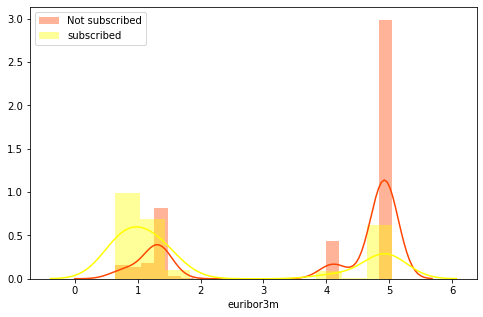

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(bank_df.loc[bank_df['y']=='no',['euribor3m']],hist=True,color='orangered',label='Not subscribed')
sns.distplot(samp1['euribor3m'],hist=True,color='yellow',label='subscribed')
plt.legend()

In [ ]:
#For values of euribor for 3 months less than 3, subscribed are more than non-subscibed
bank_df['euribor3m']=pd.cut(bank_df['euribor3m'],bins=[0,3,6],labels=['profit_euribor','loss_euribor'])

In [ ]:
dummies=pd.get_dummies(bank_df['euribor3m'])
del dummies['loss_euribor']


In [ ]:
bank_df=pd.concat([bank_df,dummies],axis=1)

In [ ]:
bank_df['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

(0.0, 16136.4)

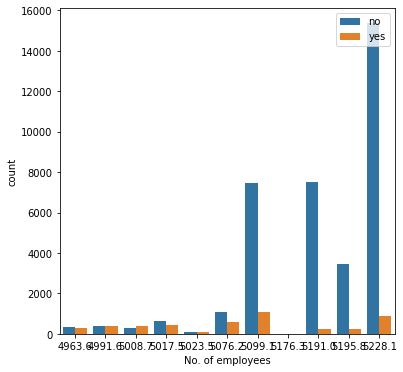

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x="nr.employed",hue="y",data=bank_df)
plt.legend(loc='upper right')
plt.xlabel('No. of employees')
plt.ylim(0,)

In [ ]:
#More no. of employees employed doesn't give any increase in subscription

In [ ]:
dummies=pd.get_dummies(bank_df['age'],drop_first=True)
bank_df=pd.concat([bank_df,dummies],axis=1)

In [ ]:
del bank_df['age']

In [ ]:
del bank_df['contact']
del bank_df['emp.var.rate']
del bank_df['euribor3m']
del bank_df['nr.employed']

In [ ]:
bank_df.dtypes

cellular                 uint8
no                       uint8
yes                      uint8
no                       uint8
yes                      uint8
no                       uint8
yes                      uint8
basic.4y                 uint8
basic.6y                 uint8
basic.9y                 uint8
high.school              uint8
illiterate               uint8
professional.course      uint8
university.degree        uint8
divorced                 uint8
married                  uint8
single                   uint8
blue-collar              uint8
entrepreneur             uint8
housemaid                uint8
management               uint8
retired                  uint8
self-employed            uint8
services                 uint8
student                  uint8
technician               uint8
unemployed               uint8
unknown                  uint8
duration                 int64
campaign                 int64
pdays                    int64
previous                 int64
cons.pri

In [ ]:
samp=bank_df.copy()
del samp['y']
X=samp.values

In [ ]:
bank_df.shape

(41188, 40)

In [ ]:
y=bank_df.loc[:,['y']].values

In [ ]:
y=y.reshape((len(y),))

In [ ]:
y.shape

(41188,)

In [ ]:
X.shape

(41188, 39)

In [ ]:
print(y)

['no' 'no' 'no' ... 'no' 'yes' 'no']


In [ ]:
print(X[1])

[  0.      1.      0.      1.      0.      0.      0.      0.      0.
   0.      1.      0.      0.      0.      0.      1.      0.      0.
   0.      0.      0.      0.      0.      1.      0.      0.      0.
   0.    149.      1.    999.      0.     93.994 -36.4     0.      0.
   0.      0.      1.   ]


In [ ]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
X=SS.fit_transform(X)

In [ ]:
print(X[1])

[-1.31826996  0.46173139 -0.42287213  1.10081447 -1.04887691 -1.94661304
 -0.00853476 -0.3358992  -0.24274754 -0.41474269  1.82448461 -0.0209096
 -0.38191849 -0.64753149 -0.35509663  0.80763764 -0.62493754 -0.53831699
 -0.19143021 -0.16252837 -0.2764353  -0.2087573  -0.18903213  3.06225816
 -0.1473267  -0.44244927 -0.15887166 -0.08987076 -0.42150051 -0.56592197
  0.1954139  -0.34949428  0.72272247  0.88644656 -0.84639306 -0.69818937
 -1.0401367  -0.73874756  3.64846917]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [ ]:
y

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA(n_components=10)
lda.fit(X,y)
X_new=lda.transform(X)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(39, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [ ]:
X_new.shape

(41188, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(30891, 39) (30891,)
(10297, 39) (10297,)


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

### Logistic Regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(random_state=0)

In [ ]:
params=[{'C':[.1,.5,1,2,3,5],'solver':['lbfgs','liblinear']}]
grid=GridSearchCV(estimator=LR,param_grid=params,scoring='accuracy',cv=10)

In [ ]:
grid.fit(X,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 0.5, 1, 2, 3, 5],
                          'solver': ['lbfgs', 'liblinear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
pm=grid.best_params_
score=grid.best_score_
print(pm)
print(score)

{'C': 0.1, 'solver': 'lbfgs'}
0.8503358557890612


In [ ]:
lr=LogisticRegression(C=.1,solver='lbfgs',random_state=0)

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[8917  222]
 [ 669  489]]


**The accuracy score obtained in Logistic Regression is .85**

### KNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=2)

In [ ]:
params={'n_neighbors':[1,2,3,4,5,6],'metric':['minkowski']}
grid=GridSearchCV(estimator=knc,param_grid=params,cv=10,scoring='accuracy')

In [ ]:
grid.fit(X,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=2, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
pr=grid.best_params_
score=grid.best_score_
print(pr)
print(score)

{'metric': 'minkowski', 'n_neighbors': 6}
0.8560446613680123


In [ ]:
KNC=KNeighborsClassifier(n_neighbors=6)

In [ ]:
KNC.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [ ]:
y_pred=KNC.predict(X_test)

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[8972  167]
 [ 879  279]]


In [ ]:
print('F1-Score:',f1_score(y_test,y_pred))

F1-Score: 0.3478802992518703


**Accuracy score in KNN is .856**

### SVC classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc=SVC(C=20,kernel='rbf',random_state=0)
svc.fit(X,y)
      

SVC(C=20, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred=svc.predict(X_test)
cm=confusion_matrix(y_test,y_pred)

In [ ]:
print(cm)

[[9040   99]
 [ 372  786]]


In [ ]:
print('F1-score:',f1_score(y_test,y_pred))
print('Accuracy score:',svc.score(X_test,y_test))

F1-score: 0.7694566813509545
Accuracy score: 0.9542585218995824


**Accuracy score in SVC in .954**

### DecisionTree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc=DecisionTreeClassifier(random_state=0,criterion='entropy')
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred=dtc.predict(X_test)
cm=confusion_matrix(y_test,y_pred)

In [ ]:
print(cm)
print('F1-Score:',f1_score(y_test,y_pred))
print('accuracy:',dtc.score(X_test,y_test))

[[8546  593]
 [ 579  579]]
F1-Score: 0.4969957081545065
accuracy: 0.886180440905118


**Accuracy score in Decision Tree Classifier is .88**

### RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier(n_estimators=100,random_state=0)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred=rfc.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print('F1-score:',f1_score(y_test,y_pred))
print('accuracy:',rfc.score(X_test,y_test))

[[8820  319]
 [ 607  551]]
F1-score: 0.5433925049309665
accuracy: 0.9100708944352724


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params={'n_estimators':[10,50,100],
        'max_features':['auto','sqrt'],
        'min_samples_split':[2,5,10],
        'bootstrap':[True,False]}
print(params)        

{'n_estimators': [10, 50, 100], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10], 'bootstrap': [True, False]}


In [ ]:
rf_random=RandomizedSearchCV(rfc,params,n_iter=100,scoring='f1',n_jobs=-1,verbose=0,cv=3,random_state=0)

In [ ]:
rf_random.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
best_params=rf_random.best_params_
best_score=rf_random.best_score_
print(best_params)
print(best_score)

{'n_estimators': 100, 'min_samples_split': 5, 'max_features': 'auto', 'bootstrap': False}
0.5432710058001965


**Best Accuracy score in Random Forest Classifier is .91**

### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc=GradientBoostingClassifier()

In [ ]:
params={'learning_rate':[.01,.05,.1,.2,.5,.8],
        'min_samples_split':[2,3,4],
        'max_depth':[3,5,7]
        }
rf_random=RandomizedSearchCV(estimator=gbc,param_distributions=params,n_iter=100,scoring='f1',n_jobs=-1,cv=3,random_state=0)        

In [ ]:
rf_random.fit(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 54 is smaller than n_iter=100. Running 54 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [ ]:
para=rf_random.best_params_
score=rf_random.best_score_
print(para)
print(score)

{'min_samples_split': 3, 'max_depth': 3, 'learning_rate': 0.2}
0.5877089326255875


In [ ]:
gbc=GradientBoostingClassifier(learning_rate=.2,n_estimators=150,min_samples_split=3,random_state=0)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=3,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_pred=gbc.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print('F1-score:',f1_score(y_test,y_pred))
print('Accuracy:',gbc.score(X_test,y_test))

[[8866  273]
 [ 546  612]]
F1-score: 0.5991189427312776
Accuracy: 0.920462270564242


**Best accuracy score in Gradient Boosting is .92**

XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb=XGBClassifier(max_depth=3,learning_rate=.1,n_estimators=100,verbosity=1,gamma=0,random_state=0)

In [ ]:
params={'max_depth':[3,4,5,6],
        'learning_rate':[.1,.2,.5,.05],
        'n_estimators':[100,150],
        'gamma':[0,.05,.1,.2]
        }
rf_random=RandomizedSearchCV(estimator=xgb,param_distributions=params,n_iter=100,scoring='f1',n_jobs=-1,cv=3,random_state=0)
rf_random.fit(X_test,y_test)        

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='de

In [ ]:
para=rf_random.best_params_
score=rf_random.best_score_
print(para)
print(score)

{'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.05}
0.6014405227153222


In [ ]:
xgb=XGBClassifier(n_estimators=100,max_depth=4,learning_rate=.1,gamma=.01,random_state=0)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.01,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred=gbc.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print('F1-score:',f1_score(y_test,y_pred))
print('Accuracy:',gbc.score(X_test,y_test))

[[8866  273]
 [ 546  612]]
F1-score: 0.5991189427312776
Accuracy: 0.920462270564242


**Best accuracy in XG-Boosting classifier is .92**

From all the above model the best one is SVC classifier having **f1-score of .77 and accuracy of approx 95%**